In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df1=df.drop(['Unnamed: 0'],axis=1)
df1.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

### 1. Explain the dataset

In [4]:
df1.shape

(200, 4)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df1.isna().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [7]:
df1.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

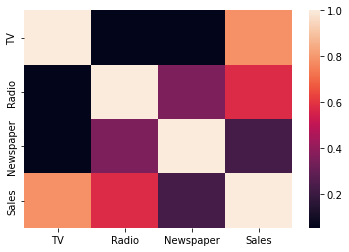

In [8]:
sns.heatmap(df1.corr())
plt.show

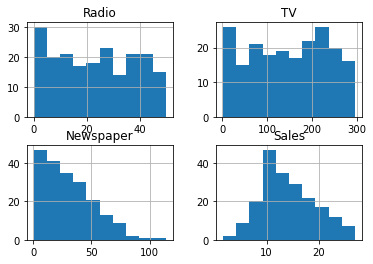

In [9]:
df1[['Radio','TV','Newspaper','Sales']].hist()
plt.show()

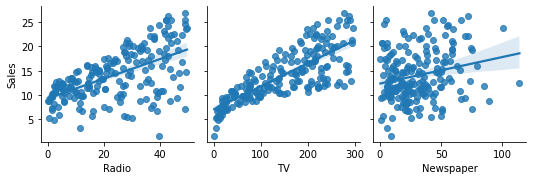

In [10]:
sns.pairplot(df1,x_vars=['Radio','TV','Newspaper'],y_vars='Sales',kind='reg')
plt.show()

the dataset consists of 200 entries and shows the amount spend for three different advertisements.
No missing value is present.Also there is no correlations among columns they are independent of each other.

### 2. Check the summary statistics and discuss the max, min, avg, median,and percentiles.

In [11]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


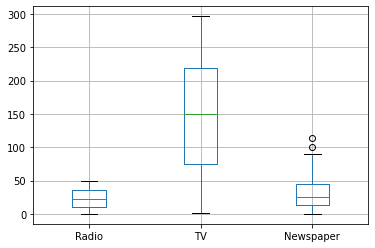

<Figure size 432x288 with 0 Axes>

In [12]:
df[['Radio','TV','Newspaper']].boxplot()
plt.show()
plt.tight_layout()

From the data it can be seen that eventhough the counts are all the same ,radio has the least value for all,then comes Newspaper and then comes TV.
On comparing Radio and Newspaper there isnt much difference but for TV the mean and all the values are much higher than the other two.

### 3. The manager wants to find out whether the same amount was spent for the three advertisements (TV , Radio and Newspaper). Comment on your findings.

#### Using F-Test

In [13]:
#set hypothesis
#Null Hypothesis,H0:The amount spent for all three advertisements are same.
#Alternate Hypothesis,Ha:The amount spent on atleast one is different.

In [14]:
# Importing library
from scipy.stats import f_oneway

In [15]:
#perform one way anova
f_oneway(df['TV'],df['Radio'],df['Newspaper'])

F_onewayResult(statistic=358.8514595342597, pvalue=4.552931539744962e-103)

The p value obtained from ANOVA analysis is 4.552931539744962e-103 (p < 0.05), and therefore we reject null hypothesis.
we conclude that there are significant differences for the amount spent for three advertisements.